In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from copy import deepcopy
from statsmodels.stats import diagnostic
from datetime import datetime
import time
%matplotlib inline

%load_ext autoreload
%autoreload 2

In [2]:
%reload_ext autoreload

In [3]:
from read_functions import *
from pickle_functions import *
from create_all_users import create_all_users
from create_rating_statistic import create_ratings_stat

In [4]:
beer_advocate_path = '../datas/BeerAdvocate/'
matched_beer_data_path = '../datas/matched_beer_data/'
rate_beer_path = '../datas/RateBeer/'

advocate_beers_path = beer_advocate_path + 'beers.csv'
advovate_breweries_path = beer_advocate_path + 'breweries.csv'
advocate_ratings_path = beer_advocate_path + 'ratings.txt'
advocate_reviews_path = beer_advocate_path + 'reviews.txt'
advocate_users_path = beer_advocate_path + 'users.csv'

matched_beer_beers = matched_beer_data_path + 'beers.csv'
matched_beer_breweries = matched_beer_data_path + 'breweries.csv'
matched_beer_ratings_ba = matched_beer_data_path + 'ratings_ba.txt'
matched_beer_ratings_rb = matched_beer_data_path + 'ratings_rb.txt'
matched_beer_ratings = matched_beer_data_path + 'ratings.csv'
matched_beer_users_approx = matched_beer_data_path + 'users_approx.csv'
matched_beer_users = matched_beer_data_path + 'users.csv'

rate_beer_beers = rate_beer_path + 'beers.csv'
rate_beer_breweries = rate_beer_path + 'breweries.csv'
rate_beer_users = rate_beer_path + 'users.csv'


In [5]:
beer_advocate_path = '../datas/BeerAdvocate/pickle/'
matched_beer_data_path = '../datas/matched_beer_data/pickle'
rate_beer_path = '../datas/RateBeer/pickle'

advocate_beers_path_pickle = beer_advocate_path + 'beers.csv'
advovate_breweries_path_pickle = beer_advocate_path + 'breweries.csv'
advocate_ratings_path_pickle = beer_advocate_path + 'ratings.txt'
advocate_reviews_path_pickle = beer_advocate_path + 'reviews.txt'
advocate_users_path_pickle = beer_advocate_path + 'users.csv'

matched_beer_beers_pickle = matched_beer_data_path + 'beers.csv'
matched_beer_breweries_pickle = matched_beer_data_path + 'breweries.csv'
matched_beer_ratings_ba_pickle = matched_beer_data_path + 'ratings_ba.txt'
matched_beer_ratings_rb_pickle = matched_beer_data_path + 'ratings_rb.txt'
matched_beer_ratings_pickle = matched_beer_data_path + 'ratings.csv'
matched_beer_users_approx_pickle = matched_beer_data_path + 'users_approx.csv'
matched_beer_users_pickle = matched_beer_data_path + 'users.csv'

rate_beer_beers_pickle = rate_beer_path + 'beers.csv'
rate_beer_breweries_pickle = rate_beer_path + 'breweries.csv'
rate_beer_users_pickle = rate_beer_path + 'users.csv'

In [6]:
#Define list of datas for each website
datas_matched_beer_names = ['df_matched_beer_beers','df_matched_beer_breweries','df_matched_beer_ratings_ba','df_matched_beer_ratings_rb','df_matched_beer_ratings','df_matched_beer_users_approx','df_matched_beer_users']
datas_advocate_names = ['df_advocate_beers','df_advocate_breweries','df_advocate_ratings','df_advocate_reviews','df_advocate_users']
datas_rate_beer_names = ['df_rate_beer_beers','df_rate_beer_breweries','df_rate_beer_users','df_rate_beer_ratings','df_rate_beer_ratings']

### Import datas stored as pickle

In [7]:
df_matched_beer_beers,df_matched_beer_breweries,df_matched_beer_ratings_ba,df_matched_beer_ratings_rb,df_matched_beer_ratings,df_matched_beer_users_approx,df_matched_beer_users = load_datas('matched_beer_data', datas_matched_beer_names)
df_rate_beer_beers,df_rate_beer_breweries,df_rate_beer_users,df_rate_beer_ratings,df_rate_beer_reviews = load_datas('RateBeer', datas_rate_beer_names)
df_advocate_beers,df_advocate_breweries,df_advocate_ratings,df_advocate_reviews,df_advocate_users = load_datas('BeerAdvocate', datas_advocate_names)

Loading df_matched_beer_beers...
Loading df_matched_beer_breweries...
Loading df_matched_beer_ratings_ba...
Loading df_matched_beer_ratings_rb...
Loading df_matched_beer_ratings...
Loading df_matched_beer_users_approx...
Loading df_matched_beer_users...
Loading df_rate_beer_beers...
Loading df_rate_beer_breweries...
Loading df_rate_beer_users...
Loading df_rate_beer_ratings...
Loading df_rate_beer_ratings...
Loading df_advocate_beers...
Loading df_advocate_breweries...
Loading df_advocate_ratings...
Loading df_advocate_reviews...
Loading df_advocate_users...


## Preprocessing data

In [8]:
df_matched_beer_users_index = deepcopy(df_matched_beer_users.iloc[0,:])
df_matched_beer_users.drop(index = 0, inplace = True)

In [9]:
#convert join date to datetime
# -*- matched -*-
df_matched_beer_users['ba'] = pd.to_datetime(pd.to_numeric(df_matched_beer_users['ba']),unit='s')
df_matched_beer_users['rb'] = pd.to_datetime(pd.to_numeric(df_matched_beer_users['rb']),unit='s')

# -*- rate_beer -*-
df_rate_beer_users['joined'] = pd.to_datetime(pd.to_numeric(df_rate_beer_users['joined']),unit='s')

In [10]:
#delete duplicate user_id

# -*- Rate Beer -*-
df_rate_beer_users.drop_duplicates(subset = 'user_id', inplace = True)
# -*- Beer Advocate -*-
df_advocate_users.drop_duplicates(subset = 'user_id', inplace = True)

### Merging datasets

In [11]:
df_all_users = create_all_users(df_advocate_users,df_matched_beer_users,df_rate_beer_users)

In [12]:
df_ratings_stat = create_ratings_stat(df_advocate_ratings,df_rate_beer_ratings, df_all_users)

Creating copies...
Merge with advocate users...
Merge with rate beer users...
Concatenate the two dataframes...
Change date format...


c:\Users\ylaar\switchdrive\epfl\ada\ada-2023-project-remontada\code\create_rating_statistic.py:40: FutureWarning: The behavior of 'to_datetime' with 'unit' when parsing strings is deprecated. In a future version, strings will be parsed as datetime strings, matching the behavior without a 'unit'. To retain the old behavior, explicitly cast ints or floats to numeric type before calling to_datetime.
  ratings_stats.date = pd.to_datetime(ratings_stats.date,unit='s')


In [13]:
df_ratings_stat.head()

,location,joined,year,user_name,nb_ratings
0,"United States, Washington",2010-02-10 11:00:00,2015,nmann08,1162
2,"United States, Washington",2010-02-10 11:00:00,2011,nmann08,1712
3,"United States, Washington",2010-02-10 11:00:00,2013,nmann08,1348
5,"United States, Washington",2010-02-10 11:00:00,2012,nmann08,788
9,"United States, Washington",2010-02-10 11:00:00,2016,nmann08,974


## Define if a user is an expert or not 

In [77]:
# def calculate_expert_score(ratings_per_year):
#     """
#     Compute the "expert" score of a user for a given list of number
#     of ratings per year where the first element is the current year,
#     the second is the number of ratings of the previous year, etc...
#     This score is used to determine if a user is an expert or not. 
#     Args:
#         ratings_per_year: List of shape (N,) containing the number of ratings 
#                           of the current year and the N - 1 previous years ratings
    
#     Return
#         score: float, expert score
#     """

#     # Apply weights based on criteria importance
#     weighted_current_year = 2 * ratings_per_year[0]
#     weighted_previous_years = 0
    
#     for k in range(len(ratings_per_year) - 1):
#         prev_year = k + 1
#         weighted_previous_years += ratings_per_year[prev_year] / (prev_year + 2)
    
#     # Calculate total score
#     score = weighted_current_year + weighted_previous_years

#     return score

In [78]:
# def calculate_expert_score_user(tags, user_id, year, num_previous_years=3):
#     """
#     Compute the "expert" score of a user for a given year taking into account
#     some previous years.
#     Args:
#         user_id: String, user's id
#         year: current year
    
#     Return
#         is_expert: 
#     """
    
#     current_year_ratings = tags.loc[(tags['year'] == year) & (tags['user_name'] == user_id)].nb_ratings
#     if current_year_ratings.empty: return 0
#     ratings_per_year = [current_year_ratings.item()]

#     for k in range(1, num_previous_years + 1):
#         previous_year_ratings = tags.loc[(tags['year'] == year - k) & (tags['user_name'] == user_id)].nb_ratings
#         if previous_year_ratings.empty: continue
#         ratings_per_year.append(previous_year_ratings.item())
    
    
#     score = calculate_expert_score(ratings_per_year)
#     return score

In [79]:
# def is_expert(score, min_score, max_score, threshold=0.95):
#     # Min-Max Scaling
#     normalized_score = (score - min_score) / (max_score - min_score)
#     return normalized_score >= threshold

In [80]:
# def build_is_expert_column(df, threshold=0.95):
#     min_year = df['year'].min()
#     max_year = df['year'].max()
    
#     user_year_is_expert = np.empty((0, 3))
    
#     for year in range(min_year, max_year+1):
#         df_current_year = df[df['year'] == year]
#         if len(df_current_year) == 0: continue
#         temp_scores = []
        
#         for _, row in df_current_year.iterrows():
#             user_id = row['user_name'] 
#             score = calculate_expert_score_user(df_ratings_stat, user_id, year)
#             temp_scores.append([user_id, year, score])
        
#         temp_scores = np.array(temp_scores)
#         max_score = np.max(temp_scores[:, 2].astype(float), axis=0)
#         temp_scores[:, 2] = is_expert(temp_scores[:, 2].astype(float), 0, max_score, threshold)
#         user_year_is_expert = np.vstack((user_year_is_expert, temp_scores))
    
#     res = pd.DataFrame(user_year_is_expert, columns=['user_name', 'year', 'is_expert'])
#     res.user_name = res.user_name.astype(str)
#     res.year = res.year.astype(int)
#     res.is_expert = res.is_expert.apply(lambda x: x.lower() == 'true')
#     return df.merge(res, on=['user_name', 'year'], how='left')
        

In [81]:
# %%time
# df_ratings_stat_expert = build_is_expert_column(df_ratings_stat[:100], threshold=0.9)
# df_ratings_stat_expert

In [88]:

def compute_expert_score(row):
    min_year = int(row.index[0])
    max_year = int(row.index[-1])
    for j in range(min_year + 3, max_year + 1):
        try:
            row[j] = 2 * row[j] + 0.5 * row[j-1] + 0.25 * row[j-2] + 0.1 * row[j-3]
        except:
            continue
    return row

def normalized_score(col):
    # Min-Max Scaling
    max_score = np.max(col)
    min_score = np.min(col)
    col = (col - min_score) / (max_score - min_score)
    return col

def is_expert(score, threshold=0.4):
    return score >= threshold

In [89]:
df_ratings_stat_pivot = df_ratings_stat.pivot(index='user_name', columns='year', values='nb_ratings')
df_ratings_stat_pivot.fillna(0, inplace=True)
df_ratings_stat_pivot.head()

year,1996,1998,1999,2000,2001,2002,2003,2004,2005,2006,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
user_name,,,,,,,,,,,,,,,,,,,,,
#3Cheers,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
(M)Rated99,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
---,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0
-----Kiki-----,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
--Dom--,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,121.0,22.0,12.0,7.0,2.0


In [90]:
df_ratings_stat_pivot_score = df_ratings_stat_pivot.apply(compute_expert_score, axis=1)
df_ratings_stat_pivot_score.head()

year,1996,1998,1999,2000,2001,2002,2003,2004,2005,2006,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
user_name,,,,,,,,,,,,,,,,,,,,,
#3Cheers,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.000,0.00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.00000,1.000000
(M)Rated99,0.0,0.0,0.0,0.0,2.0,1.0,1.0,0.95,0.825,0.75,...,0.608125,0.548125,0.493719,0.444703,0.400594,0.360845,0.325041,0.292791,0.26374,0.237572
---,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.000,0.00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,3.00000,3.000000
-----Kiki-----,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.000,0.00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2.00000,2.000000
--Dom--,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.000,0.00,...,0.000000,0.000000,0.000000,0.000000,2.000000,243.000000,166.000000,167.950000,163.77500,144.475000


In [91]:
df_ratings_stat_pivot_score_norm = df_ratings_stat_pivot_score.apply(normalized_score, axis=0)
df_ratings_stat_pivot_score_norm.head()

year,1996,1998,1999,2000,2001,2002,2003,2004,2005,2006,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
user_name,,,,,,,,,,,,,,,,,,,,,
#3Cheers,0.0,0.0,0.0,0.0,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000056,0.000025
(M)Rated99,0.0,0.0,0.0,0.0,0.001232,0.00023,0.000231,0.000172,0.000118,0.000088,...,0.000047,0.000034,0.000024,0.000019,0.000015,0.000012,0.000011,0.000009,0.000007,0.000004
---,0.0,0.0,0.0,0.0,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000179,0.000084,0.000080
-----Kiki-----,0.0,0.0,0.0,0.0,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000119,0.000056,0.000052
--Dom--,0.0,0.0,0.0,0.0,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000075,0.008380,0.005425,0.005010,0.004607,0.003988


In [92]:
df_ratings_stat_pivot_expert = is_expert(df_ratings_stat_pivot_score_norm)
df_ratings_stat_pivot_expert.head()

year,1996,1998,1999,2000,2001,2002,2003,2004,2005,2006,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
user_name,,,,,,,,,,,,,,,,,,,,,
#3Cheers,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
(M)Rated99,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
---,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
-----Kiki-----,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
--Dom--,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [93]:
df_reset = df_ratings_stat_pivot_expert.reset_index()
# Melt the DataFrame to reshape it
df_melted = pd.melt(df_reset, id_vars=['user_name'], var_name='year', value_name='is_expert')
df_ratings_stat_expert = df_ratings_stat.merge(df_melted)
df_ratings_stat_expert.head()

,location,joined,year,user_name,nb_ratings,is_expert
0,"United States, Washington",2010-02-10 11:00:00,2015,nmann08,1162,False
1,"United States, Washington",2010-02-10 11:00:00,2011,nmann08,1712,False
2,"United States, Washington",2010-02-10 11:00:00,2013,nmann08,1348,False
3,"United States, Washington",2010-02-10 11:00:00,2012,nmann08,788,False
4,"United States, Washington",2010-02-10 11:00:00,2016,nmann08,974,False


In [94]:
df_ratings_stat_expert.groupby('year').apply(lambda x: sum(x['is_expert']))

year
1996     1
1998     1
1999     1
2000     4
2001     6
2002     5
2003    18
2004    29
2005    25
2006    28
2007    25
2008    24
2009    19
2010    11
2011    11
2012    12
2013    12
2014    17
2015    18
2016    23
2017    18
dtype: int64

In [95]:
len(df_ratings_stat_expert.query('year == 2010')['user_name'].unique())

16142

## Analysis 

### Preprocess beer advocate

In [102]:
df_advocate_ratings_filtered = df_advocate_ratings.copy()
df_advocate_ratings_filtered = df_advocate_ratings_filtered.dropna(subset=['date'])
df_advocate_ratings_filtered.date = pd.to_datetime(df_advocate_ratings_filtered.date, unit='s')
df_advocate_ratings_filtered['year'] = df_advocate_ratings_filtered['date'].dt.year
df_advocate_ratings_filtered.head()

C:\Users\ylaar\AppData\Local\Temp\ipykernel_8740\1724648922.py:3: FutureWarning: The behavior of 'to_datetime' with 'unit' when parsing strings is deprecated. In a future version, strings will be parsed as datetime strings, matching the behavior without a 'unit'. To retain the old behavior, explicitly cast ints or floats to numeric type before calling to_datetime.
  df_advocate_ratings_filtered.date = pd.to_datetime(df_advocate_ratings_filtered.date, unit='s')


,beer_name,beer_id,brewery_name,brewery_id,style,abv,date,user_name,user_id,appearance,aroma,palate,taste,overall,rating,text,review,year
0,Régab,142544,Societe des Brasseries du Gabon (SOBRAGA),37262,Euro Pale Lager,4.5,2015-08-20 09:59:28,nmann08,nmann08.184925,3.25,2.75,3.25,2.75,3.0,2.88,"From a bottle, pours a piss yellow color with ...",True,2015
1,Barelegs Brew,19590,Strangford Lough Brewing Company Ltd,10093,English Pale Ale,4.5,2009-02-20 10:59:12,StJamesGate,stjamesgate.163714,3.0,3.5,3.5,4.0,3.5,3.67,Pours pale copper with a thin head that quickl...,True,2009
2,Barelegs Brew,19590,Strangford Lough Brewing Company Ltd,10093,English Pale Ale,4.5,2006-03-13 10:59:12,mdagnew,mdagnew.19527,4.0,3.5,3.5,4.0,3.5,3.73,"500ml Bottle bought from The Vintage, Antrim.....",True,2006
3,Barelegs Brew,19590,Strangford Lough Brewing Company Ltd,10093,English Pale Ale,4.5,2004-12-01 10:59:12,helloloser12345,helloloser12345.10867,4.0,3.5,4.0,4.0,4.5,3.98,NaN,True,2004
4,Barelegs Brew,19590,Strangford Lough Brewing Company Ltd,10093,English Pale Ale,4.5,2004-08-30 09:59:28,cypressbob,cypressbob.3708,4.0,4.0,4.0,4.0,4.0,4.00,"500ml bottlePours with a light, slightly hazy ...",True,2004


In [107]:
df_advocate_ratings_filtered['rating'] = pd.to_numeric(df_advocate_ratings_filtered['rating'], errors='coerce')

In [137]:
avg_ratings_expert = []
avg_ratings_normal = []

interest_years = sorted([year for year in df_advocate_ratings_filtered.year.unique() if year > 2002])

for year in interest_years:
    print(year)
    df_expert_year = df_ratings_stat_expert.query('year == @year')
    df_advocate_ratings_year = df_advocate_ratings_filtered.query('year == @year')
    expert_of_the_year = df_expert_year[df_expert_year.is_expert].user_name
    avg_expert = df_advocate_ratings_year[df_advocate_ratings_year['user_name'].isin(expert_of_the_year)]['rating'].mean()
    avg_normal = df_advocate_ratings_year[~df_advocate_ratings_year['user_name'].isin(expert_of_the_year)]['rating'].mean()
    avg_ratings_expert.append(avg_expert)
    avg_ratings_normal.append(avg_normal)

2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017


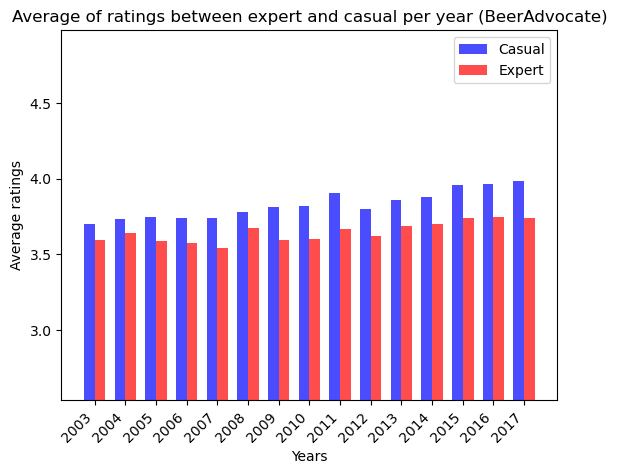

In [134]:
bar_width = 0.35
fig, ax = plt.subplots()

bar_positions1 = np.arange(len(avg_ratings_expert))
bar_positions2 = bar_positions1 + bar_width

ax.bar(bar_positions1, avg_ratings_normal, width=bar_width, label='Casual', color='blue', alpha=0.7)
ax.bar(bar_positions2, avg_ratings_expert, width=bar_width, label='Expert', color='red', alpha=0.7)

ax.set_xlabel('Years')
ax.set_ylabel('Average ratings')
ax.set_title('Average of ratings between expert and casual per year (BeerAdvocate)')
ax.set_xticks(bar_positions1 + bar_width / 2)
ax.set_xticklabels(interest_years, rotation=45, ha='right')

y_min = min(min(avg_ratings_normal), min(avg_ratings_expert)) - 1 
y_max = max(max(avg_ratings_normal), max(avg_ratings_expert)) + 1 
ax.set_ylim(y_min, y_max)
ax.legend()

# Show the plot
plt.show()

The plot shows that the user considered as expert tend to be more severe concerning the global rating of a beer.

### Preprocess rate beer

In [139]:
df_rate_beer_ratings_filtered = df_rate_beer_ratings.copy()
df_rate_beer_ratings_filtered = df_rate_beer_ratings_filtered.dropna(subset=['date'])
df_rate_beer_ratings_filtered.date = pd.to_datetime(df_rate_beer_ratings_filtered.date, unit='s')
df_rate_beer_ratings_filtered['year'] = df_rate_beer_ratings_filtered['date'].dt.year
df_rate_beer_ratings_filtered.head()

C:\Users\ylaar\AppData\Local\Temp\ipykernel_8740\1073107678.py:3: FutureWarning: The behavior of 'to_datetime' with 'unit' when parsing strings is deprecated. In a future version, strings will be parsed as datetime strings, matching the behavior without a 'unit'. To retain the old behavior, explicitly cast ints or floats to numeric type before calling to_datetime.
  df_rate_beer_ratings_filtered.date = pd.to_datetime(df_rate_beer_ratings_filtered.date, unit='s')


,beer_name,beer_id,brewery_name,brewery_id,style,abv,date,user_name,user_id,appearance,aroma,palate,taste,overall,rating,text,year
0,33 Export (Gabon),410549,Sobraga,3198,Pale Lager,5.0,2016-04-26 09:59:28,Manslow,175852,2,4,2,4,8,2.00,"Puszka 0,33l dzięki Christoph . Kolor jasnozło...",2016
1,Castel Beer (Gabon),105273,Sobraga,3198,Pale Lager,5.2,2017-02-17 10:59:12,MAGICuenca91,442761,2,3,2,4,8,1.90,Cerveza pale lager gabonesa. MÃ¡s floja que la...,2017
2,Castel Beer (Gabon),105273,Sobraga,3198,Pale Lager,5.2,2016-06-24 09:59:28,Sibarh,288889,3,3,2,3,5,1.60,"Kolor- złoty, klarowny. Piana - drobna, średni...",2016
3,Castel Beer (Gabon),105273,Sobraga,3198,Pale Lager,5.2,2016-01-01 10:59:12,fombe89,250510,4,3,1,2,5,1.50,"Botella, de GabÃ³n regalo familiar.31/01/2015C...",2016
4,Castel Beer (Gabon),105273,Sobraga,3198,Pale Lager,5.2,2015-10-23 09:59:28,kevnic2008,122778,2,4,2,4,7,1.90,Many thanks for this beer to Erzengel. Pours l...,2015


In [140]:
df_rate_beer_ratings_filtered['rating'] = pd.to_numeric(df_rate_beer_ratings_filtered['rating'], errors='coerce')

In [142]:
avg_ratings_expert = []
avg_ratings_normal = []

interest_years = sorted([year for year in df_rate_beer_ratings_filtered.year.unique() if year > 2002])

for year in interest_years:
    print(year)
    df_expert_year = df_ratings_stat_expert.query('year == @year')
    df_rate_beer_ratings_year = df_rate_beer_ratings_filtered.query('year == @year')
    expert_of_the_year = df_expert_year[df_expert_year.is_expert].user_name
    avg_expert = df_rate_beer_ratings_year[df_rate_beer_ratings_year['user_name'].isin(expert_of_the_year)]['rating'].mean()
    avg_normal = df_rate_beer_ratings_year[~df_rate_beer_ratings_year['user_name'].isin(expert_of_the_year)]['rating'].mean()
    avg_ratings_expert.append(avg_expert)
    avg_ratings_normal.append(avg_normal)

2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017


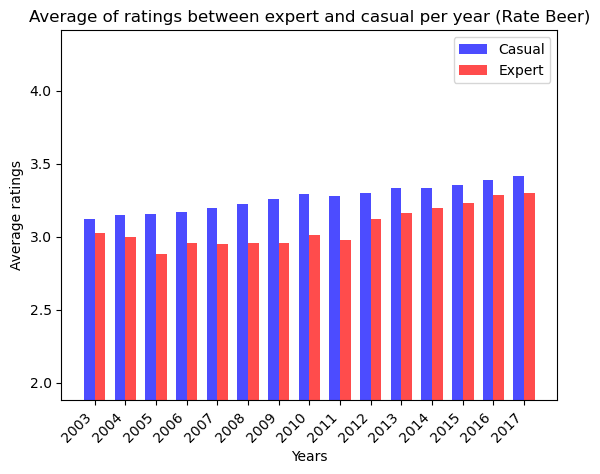

In [144]:
bar_width = 0.35
fig, ax = plt.subplots()

bar_positions1 = np.arange(len(avg_ratings_expert))
bar_positions2 = bar_positions1 + bar_width

ax.bar(bar_positions1, avg_ratings_normal, width=bar_width, label='Casual', color='blue', alpha=0.7)
ax.bar(bar_positions2, avg_ratings_expert, width=bar_width, label='Expert', color='red', alpha=0.7)

ax.set_xlabel('Years')
ax.set_ylabel('Average ratings')
ax.set_title('Average of ratings between expert and casual per year (Rate Beer)')
ax.set_xticks(bar_positions1 + bar_width / 2)
ax.set_xticklabels(interest_years, rotation=45, ha='right')

y_min = min(min(avg_ratings_normal), min(avg_ratings_expert)) - 1 
y_max = max(max(avg_ratings_normal), max(avg_ratings_expert)) + 1 
ax.set_ylim(y_min, y_max)
ax.legend()

# Show the plot
plt.show()

## Initial data analysis

### Beer Advocate

In [19]:
df_advocate_beers.head()

,beer_id,beer_name,brewery_id,brewery_name,style,nbr_ratings,nbr_reviews,avg,ba_score,bros_score,abv,avg_computed,zscore,nbr_matched_valid_ratings,avg_matched_valid_ratings
0,166064,Nashe Moskovskoe,39912,Abdysh-Ata (Абдыш Ата),Euro Pale Lager,0,0,NaN,NaN,NaN,4.7,NaN,NaN,0,NaN
1,166065,Nashe Pivovskoe,39912,Abdysh-Ata (Абдыш Ата),Euro Pale Lager,0,0,NaN,NaN,NaN,3.8,NaN,NaN,0,NaN
2,166066,Nashe Shakhterskoe,39912,Abdysh-Ata (Абдыш Ата),Euro Pale Lager,0,0,NaN,NaN,NaN,4.8,NaN,NaN,0,NaN
3,166067,Nashe Zhigulevskoe,39912,Abdysh-Ata (Абдыш Ата),Euro Pale Lager,0,0,NaN,NaN,NaN,4.0,NaN,NaN,0,NaN
4,166063,Zhivoe,39912,Abdysh-Ata (Абдыш Ата),Euro Pale Lager,0,0,NaN,NaN,NaN,4.5,NaN,NaN,0,NaN


In [20]:
df_advocate_breweries.head()

,id,location,name,nbr_beers
0,39912,Kyrgyzstan,Abdysh-Ata (Абдыш Ата),5
1,39913,Kyrgyzstan,Arpa (АРПА),1
2,39914,Kyrgyzstan,Bear Beer,4
3,39915,Kyrgyzstan,Blonder Pub,4
4,39916,Kyrgyzstan,Kellers Bier,2


In [35]:
df_matched_beer_ratings.columns

Index(['abv', 'appearance', 'aroma', 'beer_id', 'beer_name', 'brewery_id',
       'brewery_name', 'date', 'overall', 'palate', 'rating', 'review',
       'style', 'taste', 'text', 'user_id', 'user_name', 'abv.1',
       'appearance.1', 'aroma.1', 'beer_id.1', 'beer_name.1', 'brewery_id.1',
       'brewery_name.1', 'date.1', 'overall.1', 'palate.1', 'rating.1',
       'style.1', 'taste.1', 'text.1', 'user_id.1', 'user_name.1'],
      dtype='object')

In [31]:
df_advocate_reviews.head()

,beer_name,beer_id,brewery_name,brewery_id,style,abv,date,user_name,user_id,appearance,aroma,palate,taste,overall,rating,text
0,Régab,142544,Societe des Brasseries du Gabon (SOBRAGA),37262,Euro Pale Lager,4.5,1440064800,nmann08,nmann08.184925,3.25,2.75,3.25,2.75,3.0,2.88,"From a bottle, pours a piss yellow color with ..."
1,Barelegs Brew,19590,Strangford Lough Brewing Company Ltd,10093,English Pale Ale,4.5,1235127600,StJamesGate,stjamesgate.163714,3.0,3.5,3.5,4.0,3.5,3.67,Pours pale copper with a thin head that quickl...
2,Barelegs Brew,19590,Strangford Lough Brewing Company Ltd,10093,English Pale Ale,4.5,1142247600,mdagnew,mdagnew.19527,4.0,3.5,3.5,4.0,3.5,3.73,"500ml Bottle bought from The Vintage, Antrim....."
3,Barelegs Brew,19590,Strangford Lough Brewing Company Ltd,10093,English Pale Ale,4.5,1101898800,helloloser12345,helloloser12345.10867,4.0,3.5,4.0,4.0,4.5,3.98,NaN
4,Barelegs Brew,19590,Strangford Lough Brewing Company Ltd,10093,English Pale Ale,4.5,1093860000,cypressbob,cypressbob.3708,4.0,4.0,4.0,4.0,4.0,4.00,"500ml bottlePours with a light, slightly hazy ..."


In [23]:
df_advocate_users.head()

,nbr_ratings,nbr_reviews,user_id,user_name,joined,location
0,7820,465,nmann08.184925,nmann08,2008-01-07 11:00:00,"United States, Washington"
1,2521,2504,stjamesgate.163714,StJamesGate,2007-10-08 10:00:00,"United States, New York"
2,1797,1143,mdagnew.19527,mdagnew,2005-05-18 10:00:00,Northern Ireland
3,31,31,helloloser12345.10867,helloloser12345,2004-11-25 11:00:00,Northern Ireland
4,604,604,cypressbob.3708,cypressbob,2003-11-20 11:00:00,Northern Ireland


Count how much ratings and reviews each user has posted.

In [24]:
rating_per_user = df_advocate_ratings.groupby('user_id')['rating'].count().sort_values(ascending=False)
print(f'number of users which have given at least one rating: {len(rating_per_user)}')

number of users which have given at least one rating: 153704


In [16]:
rating_per_user.describe()

count    153704.000000
mean         54.605163
std         252.388790
min           1.000000
25%           1.000000
50%           3.000000
75%          16.000000
max       12046.000000
Name: rating, dtype: float64

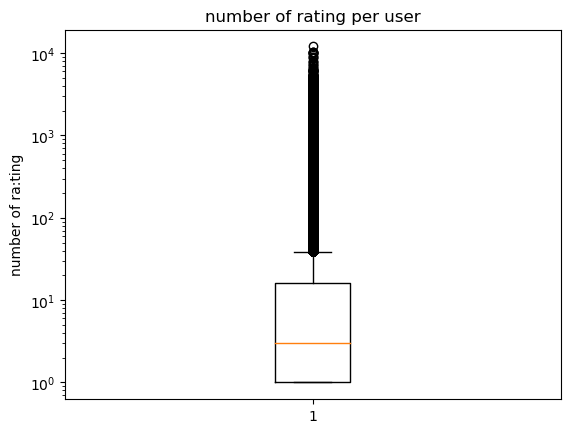

In [17]:
plt.boxplot(rating_per_user)
plt.semilogy()
plt.ylabel('number of rating')
plt.title('number of rating per user')
plt.show()

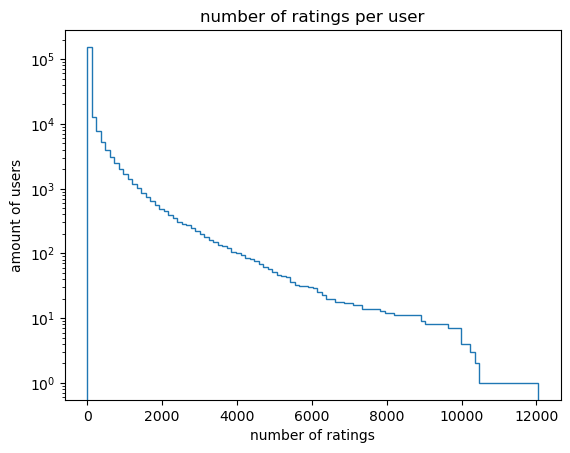

In [18]:
array_cumulative = plt.hist(rating_per_user, bins=100, log=True, cumulative=-1, histtype='step')
plt.xlabel('number of ratings')
plt.ylabel('amount of users')
plt.title('number of ratings per user')
plt.show() 

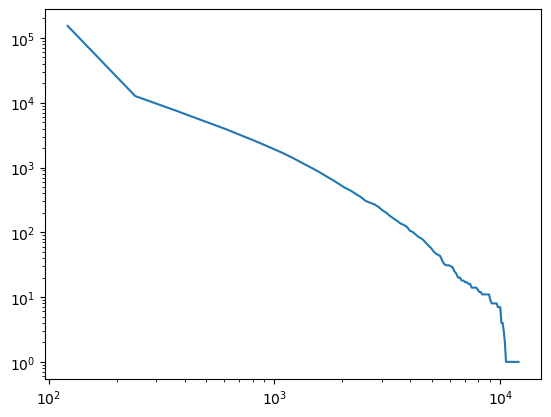

In [19]:
plt.loglog(array_cumulative[1][1:],array_cumulative[0])

In [20]:
rating_per_user.describe()

count    153704.000000
mean         54.605163
std         252.388790
min           1.000000
25%           1.000000
50%           3.000000
75%          16.000000
max       12046.000000
Name: rating, dtype: float64

In [21]:
five_last_percent = np.percentile(rating_per_user, 99)
sum(rating_per_user > five_last_percent)

1537

In [22]:
top_rating_per_user = rating_per_user[rating_per_user > five_last_percent]
top_rating_per_user

user_id
sammy.3853               12046
acurtis.508168           10360
texasfan549.572853       10302
kylehay2004.571365       10180
grg1313.288024            9991
                         ...  
saxmanrick.675576         1026
kingcrowing.311556        1025
futbolmanby.1010699       1024
trickkygangsta.640751     1024
ricks95.5391              1024
Name: rating, Length: 1537, dtype: int64

In [23]:
top_rating_per_user.describe()

count     1537.000000
mean      1968.392973
std       1251.589991
min       1024.000000
25%       1222.000000
50%       1539.000000
75%       2191.000000
max      12046.000000
Name: rating, dtype: float64

In [24]:
df_advocate_ratings['rating'] = pd.to_numeric(df_advocate_ratings['rating'], errors='coerce')
df_advocate_ratings_clean = df_advocate_ratings.dropna(subset=['beer_id', 'rating'])

In [36]:
normal_users_rating = df_advocate_ratings_clean[~df_advocate_ratings_clean['user_id'].isin(top_rating_per_user.index)]
normal_beers_rating_average = normal_users_rating.groupby('beer_id')['rating'].mean()

In [37]:
normal_beers_rating_average

beer_id
10        3.808164
100       3.145625
1000      3.839438
100000    3.779091
100001    3.940000
            ...   
99993     4.000000
99996     2.625000
99997     4.195732
99998     3.530000
99999     3.875000
Name: rating, Length: 170177, dtype: float64

In [38]:
expert_user_rating = df_advocate_ratings_clean[df_advocate_ratings_clean['user_id'].isin(top_rating_per_user.index)]

In [39]:
expert_beers_rating_average = expert_user_rating.groupby('beer_id')['rating'].mean()

In [29]:
beers_rating_average[expert_beers_rating_average.index]

beer_id
10        3.806157
100       3.118889
1000      3.807516
100000    3.706538
100002    3.777500
            ...   
99995     2.900000
99996     3.238000
99997     4.100178
99998     3.506667
99999     3.889091
Name: rating, Length: 215997, dtype: float64

In [78]:
expert_rating_avg = expert_beers_rating_average.reset_index()
expert_rating_avg.columns = ['beer_id', 'expert_rating']
expert_rating_avg.head()

,beer_id,expert_rating
0,10,3.800966
1,100,3.003450
2,1000,3.763125
3,100000,3.653333
4,100002,3.764444


In [79]:
normal_rating_avg = normal_beers_rating_average.reset_index()
normal_rating_avg.columns = ['beer_id', 'normal_rating']
normal_rating_avg.head()

,beer_id,normal_rating
0,10,3.808164
1,100,3.145625
2,1000,3.839438
3,100000,3.779091
4,100001,3.940000


In [84]:
merged_expert_normal_rating = expert_rating_avg.merge(normal_rating_avg, on='beer_id', how='inner')
merged_expert_normal_rating['beer_id'] = merged_expert_normal_rating['beer_id'].astype(int)
merged_expert_normal_rating = merged_expert_normal_rating.merge(df_advocate_beers[['beer_id', 'beer_name']], on='beer_id', how='left')
merged_expert_normal_rating.head()

,beer_id,expert_rating,normal_rating,beer_name
0,10,3.800966,3.808164,Allagash Dubbel Ale
1,100,3.003450,3.145625,Blue Moon Harvest Moon Pumpkin Ale
2,1000,3.763125,3.839438,Winter Brew
3,100000,3.653333,3.779091,Rosalind
4,100002,3.764444,3.794286,Dead Eye Dunkel


In [85]:
merged_expert_normal_rating['diff_rating'] = np.abs(merged_expert_normal_rating['expert_rating'] - merged_expert_normal_rating['normal_rating'])
merged_expert_normal_rating

,beer_id,expert_rating,normal_rating,beer_name,diff_rating
0,10,3.800966,3.808164,Allagash Dubbel Ale,0.007198
1,100,3.003450,3.145625,Blue Moon Harvest Moon Pumpkin Ale,0.142175
2,1000,3.763125,3.839438,Winter Brew,0.076313
3,100000,3.653333,3.779091,Rosalind,0.125758
4,100002,3.764444,3.794286,Dead Eye Dunkel,0.029841
...,...,...,...,...,...
138187,99993,3.870000,4.000000,Black Ale,0.130000
138188,99996,3.646667,2.625000,Nils Oscar SMÖF Jubelöl 2013,1.021667
138189,99997,4.010115,4.195732,Muy Bonita,0.185617
138190,99998,3.500000,3.530000,Scratch Beer 114 - 2013 (Abbey Dubbel),0.030000


In [86]:
merged_expert_normal_filtered = merged_expert_normal_rating.query('diff_rating > 3')
merged_expert_normal_filtered

,beer_id,expert_rating,normal_rating,beer_name,diff_rating
7886,111785,4.125000,1.000000,Drift Line - Dry Hopped With Centennial & Chinook,3.125000
21347,132040,1.515000,4.832857,Enkindled Smoked IPA,3.317857
22117,133288,5.000000,1.040000,Bubblelicious Weisse,3.960000
23517,135587,1.000000,4.905000,Farmhouse Ale,3.905000
26175,139991,1.000000,4.550000,Oktoberfest,3.550000
45835,179106,5.000000,1.190000,Chigoatlé,3.810000
64638,223453,4.125000,1.000000,Jose Ocampo,3.125000
73275,245711,4.100000,1.000000,Compound Interest,3.100000
76577,254152,1.580000,4.665000,Subject Nine,3.085000
76730,254558,4.145000,1.000000,Badunkeldonk,3.145000


337 beers have a rating which is very different between expert and normal user !

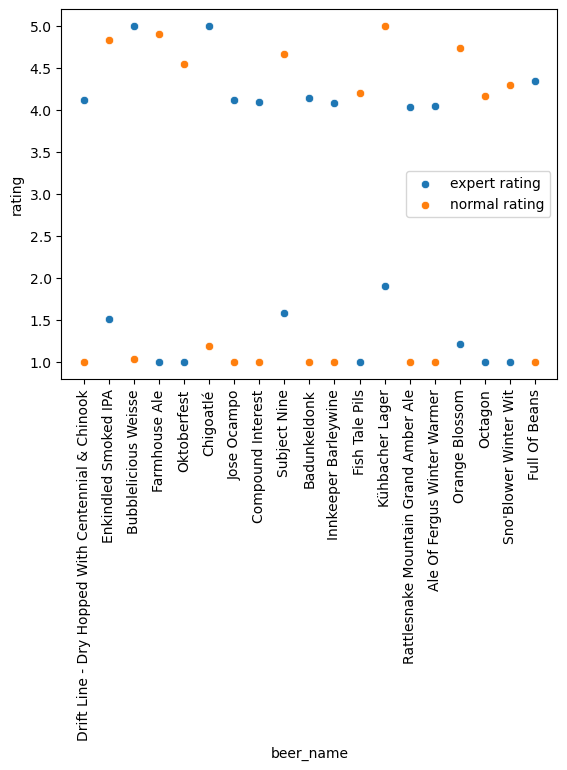

In [92]:
sns.scatterplot(data=merged_expert_normal_filtered, x='beer_name', y='expert_rating', label='expert rating')
sns.scatterplot(data=merged_expert_normal_filtered, x='beer_name', y='normal_rating', label='normal rating')
plt.xticks(rotation=90)
plt.ylabel('rating')
plt.legend()
plt.show()

## Define if a user is an expert or not 

In [118]:
def calculate_expert_score(ratings_per_year):
    """
    Compute the "expert" score of a user for a given list of number
    of ratings per year where the first element is the current year,
    the second is the number of ratings of the previous year, etc...
    This score is used to determine if a user is an expert or not. 
    Args:
        ratings_per_year: List of shape (N,) containing the number of ratings 
                          of the current year and the N - 1 previous years ratings
    
    Return
        score: float, expert score
    """

    # Apply weights based on criteria importance
    weighted_current_year = 2 * ratings_per_year[0]
    weighted_previous_years = 0
    
    for k in range(len(ratings_per_year) - 1):
        prev_year = k + 1
        weighted_previous_years += ratings_per_year[prev_year] / (prev_year + 1)
    
    # Calculate total score
    score = weighted_current_year + weighted_previous_years

    return score

In [125]:
def calculate_expert_score_user(tags, user_id, year, num_previous_years=3):
    """
    Compute the "expert" score of a user for a given year taking into account
    some previous years.
    Args:
        user_id: String, user's id
        year: current year
    
    Return
        is_expert: 
    """
    
    current_year_ratings = tags.loc[(tags['year'] == year) & (tags['user_id'] == user_id)].total_ratings.astype(int)
    ratings_per_year = [current_year_ratings]
    
    for k in range(1, num_previous_years + 1):
        previous_year_ratings = tags.loc[(tags['year'] == year - k) & (tags['user_id'] == user_id)].total_ratings.astype(int)
        if previous_year_ratings.empty: continue
        ratings_per_year.append(previous_year_ratings)
    
    score = calculate_expert_score(ratings_per_year)
    
    return score.item()

In [224]:
def is_expert(score, min_score, max_score, threshold=0.95):
    # Min-Max Scaling
    normalized_score = (score - min_score) / (max_score - min_score)
    return normalized_score >= threshold

In [237]:
def build_is_expert_column(df, threshold=0.95):
    min_year = df['year'].min()
    max_year = df['year'].max()
    
    user_year_is_expert = np.empty((0, 3))
    
    for year in range(min_year, max_year+1):
        df_current_year = df[df['year'] == year]
        temp_scores = []
        for _, row in df_current_year.iterrows():
            user_id = row['user_id'] 
            score = calculate_expert_score_user(df_current_year, user_id, year)
            temp_scores.append([user_id, year, score])
        
        temp_scores = np.array(temp_scores)
        max_score = np.max(temp_scores[:, 2].astype(int), axis=0)
        temp_scores[:, 2] = is_expert(temp_scores[:, 2].astype(int), 0, max_score, threshold)
        user_year_is_expert = np.vstack((user_year_is_expert, temp_scores))
    
    res = pd.DataFrame(user_year_is_expert, columns=['user_id', 'year', 'is_expert'])
    res.user_id = res.user_id.astype(str)
    res.year = res.year.astype(int)
    res.is_expert = res.is_expert.apply(lambda x: x.lower() == 'true')
    return df.merge(res, on=['user_id', 'year'], how='left')
        

In [238]:
data = {
    'user_id': ['Jean', 'Didier', 'Jean-Reno en 443','Di La Fontaine123', 'ZUG SIERRA/s34'],
    'total_ratings': [150, 200, 10, 180, 250],
    'year': [2019, 2020, 2020, 2021, 2022]
}
df = pd.DataFrame(data)
df

,user_id,total_ratings,year
0,Jean,150,2019
1,Didier,200,2020
2,Jean-Reno en 443,10,2020
3,Di La Fontaine123,180,2021
4,ZUG SIERRA/s34,250,2022


In [239]:
build_is_expert_column(df, threshold=0.95)

,user_id,total_ratings,year,is_expert
0,Jean,150,2019,True
1,Didier,200,2020,True
2,Jean-Reno en 443,10,2020,False
3,Di La Fontaine123,180,2021,True
4,ZUG SIERRA/s34,250,2022,True
